# BGE token length distribution
I deliberately construct BGE dataset without the answer (ABCD). This is because I want BGE to search for possible misconception, given a question.

In [1]:
import json
from transformers import AutoTokenizer
import seaborn as sns
import numpy as np

In [2]:
queries = []
passages = []
with open("data/bge_dataset/train_mined_hn_stage1.jsonl", "r") as f:
    for line in f.readlines():
        d = json.loads(line)
        queries.append(d["query"])
        passages += d["pos"] + d["neg"]
len(queries), len(passages)

(1395, 23687)

In [3]:
tokenizer = AutoTokenizer.from_pretrained("BAAI/bge-large-en-v1.5")

In [4]:
tokenized_queries = tokenizer(queries)
query_lengths = np.array([len(e) for e in tokenized_queries["input_ids"]])
tokenized_passages = tokenizer(passages)
passage_lengths = np.array([len(e) for e in tokenized_passages["input_ids"]])

query average 73.6494623655914


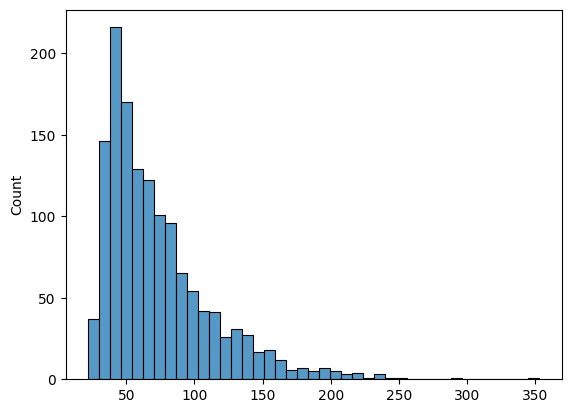

In [5]:
print("query average", query_lengths.mean())
sns.histplot(query_lengths);

passage average 20.92181365305864


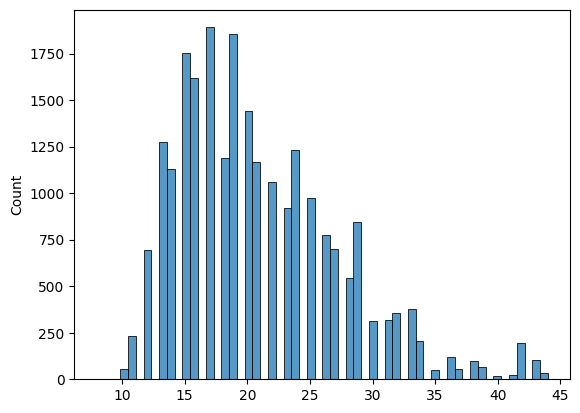

In [6]:
print("passage average", passage_lengths.mean())
sns.histplot(passage_lengths);